# Tutorial 01 - Experimental Central Limit Theorem #

In this tutorial we will do some experiments, get familiar with some of the 
statistical distribution functions and displaying the output.

The central limit theorem states that the sum of an infinite number of 
identically distributed random numbers will be normally (or Gaussian) 
distributed.  We will go over this in lecture, but here we will verify 
it in a numerical experiment by adding together informally distributed 
numbers.

 In this tutorial you will use the following library functions :
 
 np.random.uniform(), np.sort(), np.arange(), np.mean(), np.std()
 plt.hist(), plt.show(), plt.plot(), plt.legend()
 stats.norm.cdf()

 You can find documentation for them by googling.

In [77]:
## import numpy, matplotlib.pyplot and scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

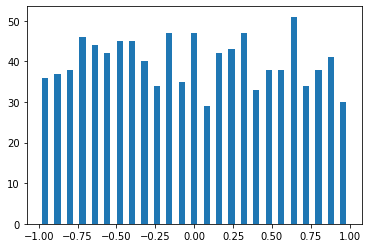

(array([36., 37., 38., 46., 44., 42., 45., 45., 40., 34., 47., 35., 47.,
       29., 42., 43., 47., 33., 38., 38., 51., 34., 38., 41., 30.]), array([-0.99888968, -0.91894179, -0.8389939 , -0.75904601, -0.67909813,
       -0.59915024, -0.51920235, -0.43925446, -0.35930658, -0.27935869,
       -0.1994108 , -0.11946291, -0.03951503,  0.04043286,  0.12038075,
        0.20032864,  0.28027652,  0.36022441,  0.4401723 ,  0.52012019,
        0.60006808,  0.68001596,  0.75996385,  0.83991174,  0.91985963,
        0.99980751]), <BarContainer object of 25 artists>)
[ 2.13948937e-01 -8.88078207e-01 -1.43570923e-01 -4.50688429e-02
 -4.33652348e-01 -3.83766176e-01 -3.08241997e-01  9.89974228e-01
 -4.75894782e-01  9.48417697e-01  5.29644740e-01  7.60820682e-02
  6.44313150e-01 -9.70393459e-01 -9.47249988e-01 -9.97515166e-01
  1.85561759e-01  3.23480397e-02 -3.50359122e-01 -1.70692394e-01
  4.55312609e-01 -8.90453805e-01 -5.35246524e-01 -5.37825194e-01
  2.93722342e-01  7.24734046e-01 -3.72656372e-02 

In [78]:
# 1) make a sample of 1000 random points uniformly distributed between -1 and 1
# put it in a numpy array x

x = np.random.uniform(-1,1,1000)

# make a histogram of the points using plt.hist()
# the number of bins should be Nbins = 25

_1=plt.hist(x,bins=25,rwidth=0.5,histtype='bar')
plt.show()
print(_1)
print(x)

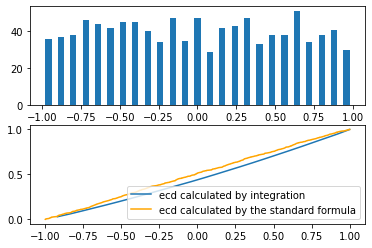

In [79]:
# 2) make the empirical cumulative distribution (ECD) of these points
# by sorting x and then plot it against rank , i.e. location in the order.
# If x is sorted then ECD has y value equal to i/(n-1) and x value equal to x[i].
# (remember len() ) It is a plot of the fraction of the random values in the sample that are less 
# than some value.  The ECD is a much better way of comparing the distribution than 
# a histogram is.
_2=plt.subplot(211)
_2=plt.hist(x,bins=25,histtype='bar',rwidth=0.5)
#calculate ecd with integration
pdf=_2[0]/sum(_2[0])
ecd=np.cumsum(np.sort(pdf))
#calculate ecd with the formula
x=np.sort(x)
y=[]
for j in range(0,1000):
    y.append(j/(1000-1))
    
_3=plt.subplot(212)
_3=plt.plot(np.sort(_2[1][1:26]),ecd,label='ecd calculated by integration')
_test=plt.plot(x,y,c='orange',label='ecd calculated by the standard formula')
plt.legend()
plt.show()

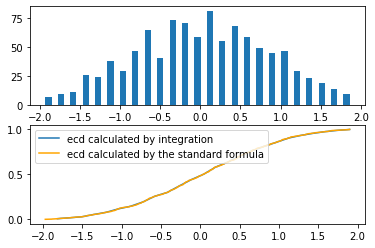

In [80]:
# 3) Now we want to make 1000 random numbers that are the 
# sum of two uniformly distributed random numbers.

# make two arrays, 1000 long, of uniform random numbers and add them together

# make a histogram of the result with 25 bins

# make the ECD of the sample and plot it

# You should see that the distribution is different from 2), but not normal.

uni_1=np.random.uniform(-1,1,1000)
uni_2=np.random.uniform(-1,1,1000)
uni_sum=uni_1+uni_2
_4=plt.subplot(211)
_4=plt.hist(uni_sum,bins=25,rwidth=0.5)
pdf_uni=_4[0]/sum(_4[0])
ecd_uni=np.cumsum(pdf_uni)
_5=plt.subplot(212)
_5=plt.plot(np.sort(_4[1][1:26]),ecd_uni,label='ecd calculated by integration')
#
xx=np.sort(uni_sum)
yy=[]
for i in range(len(uni_sum)):
    yy.append(i/(len(uni_sum)-1))
_test=plt.plot(xx,yy,c='orange',label='ecd calculated by the standard formula')

plt.legend()
plt.show()

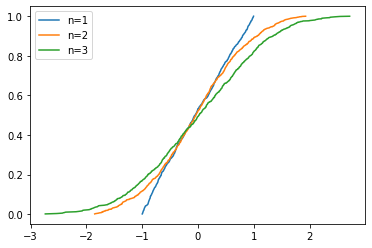

In [81]:
# 4) That was for two random numbers added together.  Now we 
# want to add more random numbers together and see how the 
# distribution changes.

# make a loop that goes over the number of numbers that will be added together
#  make the number n = 1,2 and 3
y = (np.arange(1000) + 1.)/1000.#formula of ECD
for n in range(1,4,1) :
    # Add n arrays of 1000 random deviates together.  Use a loop for this.
    # Keep it ina an array called x.
    x = np.zeros(1000)
    for i in range(n) :
        x = x + np.random.uniform(-1,1,1000)
        x=np.sort(x)
    # make the ECD curve by sorting
    # add a ECD curve to the plot
    plt.plot(x,y,label='n='+str(n))
    
plt.legend()
plt.show()

# You can see that the ECD gets wider as n increases and the curve changes

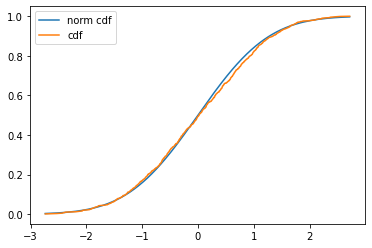

1.0115466607094834


In [82]:
# 5) Now we want to compare the distribution of x to a normal 
# distribution.  To do this we must use a normal distribution 
# with the same variance (or standard deviation) as the sample 
# x.

# Find the standard deviation of the sample x found in 4).  There 
# is a numpy function for this.  Put it in a variable sd and print it. 

# Use stats.norm to find the cumulative distribution function 
# for a normal distribution with the same standard deviation 
# evaluated at the same points x

# plot CDF of the normal distribution and the ECD of the sample 
# together.  

# Is the sum of 3 uniformly distributed numbers normally distributed?
# You can experiment with more or fewer by changing the range of n in 4)
# and running it over again.
#
# We will look at some ways of testing for normality more rigorously in lecture. 

x=np.sort(x)
STD=np.std(x)
norm_cdf=stats.norm.cdf(x)

plt.plot(x,norm_cdf,label='norm cdf')
plt.plot(x,y, label='cdf')
plt.legend()
plt.show()

print(STD)

6) 
A normal distribution has no maximum or minimum.  What is the theoretical maximum value that the variable above could have?
\
Theoretical maximum is 3. 
\
How many sigma (standard deviations) is it way from the mean?


In [83]:
print(3/STD)

2.965755428321859


 7) Extra credit

 Do the same as 4) and 5) but use a Poisson distribution with mean 1 
 (np.random.poisson) instead of a uniform distribution.  Also subtract
 number of random variables from the sum so that its average remains 
 the same as the number added together gets larger, 
 i.e. $y = \left[ \sum_{i=1}^n x_i \right]- n$ should be your random variable.

 Does this approach a normal distribution?  You can increase n to 
 experiment.


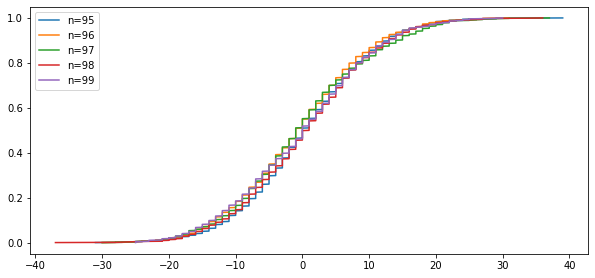

1.0115466607094834


In [84]:
y = (np.arange(1000) + 1.)/1000.#formula of ECD
fig = plt.figure(figsize=(10,10))

for n in range(95,100,1) :
    # Add n arrays of 1000 random deviates together.  Use a loop for this.
    # Keep it ina an array called x.
    x = np.zeros(1000)
    for i in range(n) :
        x = x + np.random.poisson(1,1000) - 1
        x=np.sort(x)
    # make the ECD curve by sorting
    # add a ECD curve to the plot
    ax1=plt.subplot(211)
    ax1.plot(x,y,label='n='+str(n))

#ax1.plot(x,norm_cdf,label='norm_cdf')

plt.legend()
plt.show()

print(STD)
